# Final Assignment - Module 4
## Task 3: Load dataset

In [72]:
import pandas as pd
import numpy as np
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Task 4: Generate Descriptive Statistics and Visualizations

### No. 1

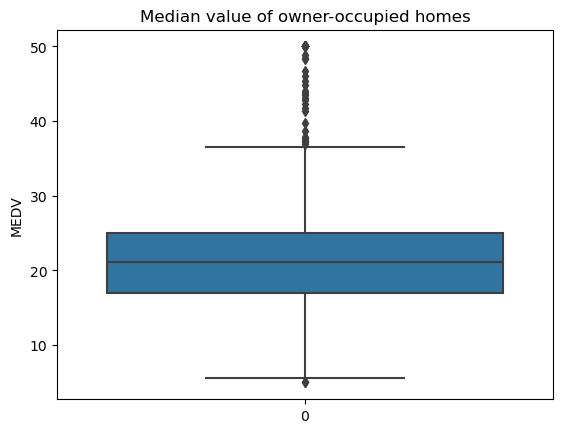

The median value of owner-occupied homes is: 21.2


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.boxplot(boston_df["MEDV"])
ax.set_title("Median value of owner-occupied homes")
ax.set_ylabel("MEDV")
plt.show()

print("The median value of owner-occupied homes is:", boston_df["MEDV"].median())

### No. 2

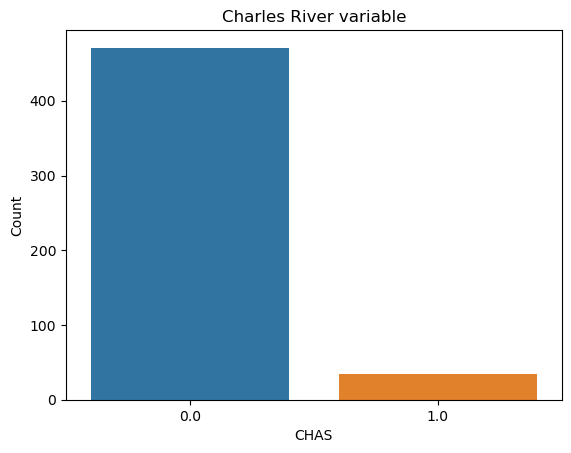

CHAS
0.0    471
1.0     35
Name: count, dtype: int64


In [80]:
ax = sns.countplot(x = "CHAS", data=boston_df)
ax.set_title("Charles River variable")
ax.set_ylabel("Count")
plt.show()

a = boston_df.value_counts("CHAS")
print(a)

35 houses are river-bound, 471 are not river-bound.

### No. 3

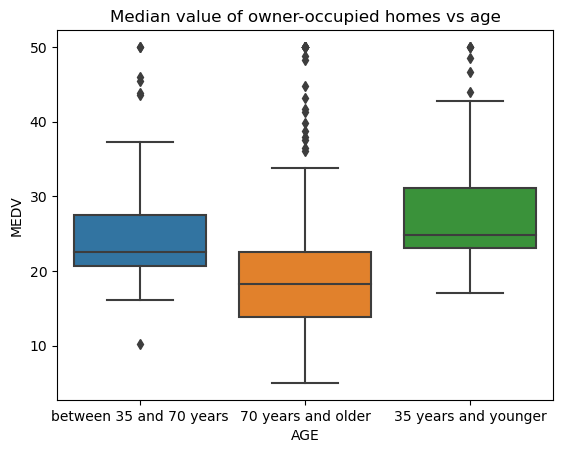

The MEDVs are 24.8 , 22.6 and 18.2 , respectively, suggesting a decrease in MEDV with age.


In [85]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

ax = sns.boxplot(x="age_group", y="MEDV", data=boston_df)
ax.set_title("Median value of owner-occupied homes vs age")
ax.set_ylabel("MEDV")
ax.set_xlabel("AGE")

plt.show()

a = boston_df[boston_df["age_group"] == "35 years and younger"]["MEDV"].median()
b = boston_df[boston_df["age_group"] == "between 35 and 70 years"]["MEDV"].median()
c = boston_df[boston_df["age_group"] == "70 years and older"]["MEDV"].median()

print("The MEDVs are" ,a, ",", b, "and", c, ", respectively, suggesting a decrease in MEDV with age.")

### No. 4

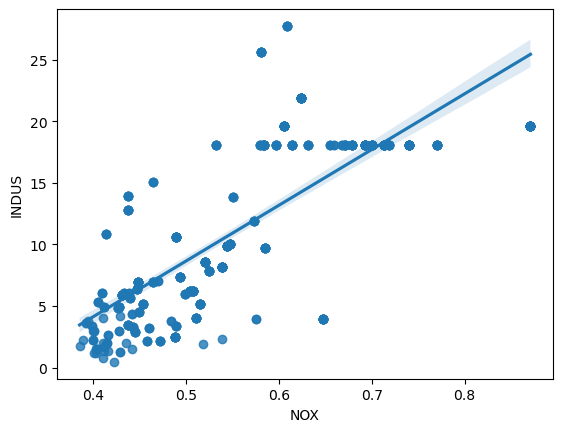

NOX and INDUS are positively correlated, i.e., the higher the NOX concentration, the higher the INDUS.


In [43]:
ax = sns.regplot(x="NOX", y="INDUS", data=boston_df)
plt.show()

print("NOX and INDUS are positively correlated, i.e., the higher the NOX concentration, the higher the INDUS.")

### No. 5

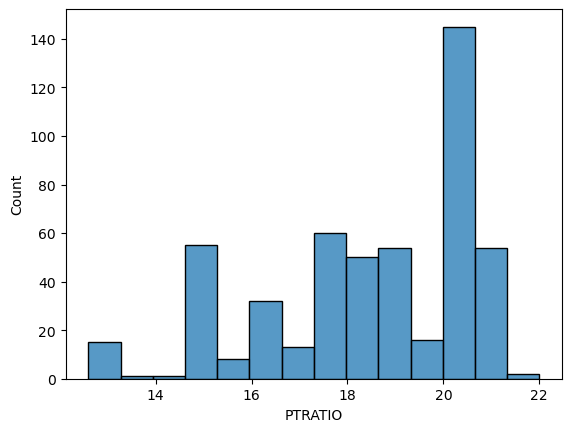

The PTRATIO shows a left-(negative)skewed distribution.


In [47]:
ax = sns.histplot(boston_df["PTRATIO"])
plt.show()

print("The PTRATIO shows a left-(negative)skewed distribution.")

## Task 5: Use the appropriate tests to answer the questions provided

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

- H0: There is no difference between the medians of houses bounded by the Charles river.
- H1: There is a difference between the medians of houses bounded by the Charles river.

In [84]:
import scipy.stats

boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS2'] = 'non-bounded'
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS2'] = 'bounded'

scipy.stats.ttest_ind(boston_df[boston_df['CHAS2'] == "non-bounded"]["MEDV"],
                   boston_df[boston_df['CHAS2'] == "bounded"]["MEDV"], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

The medians of houses bounded or non-bounded by the Charles river differ significantly.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

- H0: The population medians are equal. 
- H1: The population medians are not equal.

In [89]:
young = boston_df.loc[(boston_df['AGE'] <= 35)]["MEDV"]
middle = boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70)]["MEDV"]
old = boston_df.loc[(boston_df['AGE'] >= 70)]["MEDV"]

f_statistic, p_value = scipy.stats.f_oneway(young, middle, old)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Since *p* < 0.05, there is at least one significant difference between the groups.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

- H0: There is no correlation between NOX and INDUS.
- H1: There is a relationship between NOX and INDUS.

In [60]:
scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

NOX and INDUS are (significantly) positively correlated with a strong Pearson correlation coefficient of *rho* = 0.76.

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

- H0: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes (estimate = 0).
- H1: There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes (estimate = 0)

In [61]:
import statsmodels.api as sm

x = boston_df["DIS"]
y = boston_df["MEDV"]
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 26 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        14:05:23   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The estimate of DIS contributes significantly (*t* = 5.79, confidence intervals do not include 0) to the linear model.
Thus, H0 is rejected: An additional weighted distance of DIS increases the MEDV of approximately 1. 